<a href="https://colab.research.google.com/github/harshalkumeriya/machine-learning-basics/blob/master/AffineTransforms_with_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import io, transform
import numpy as np
import tensorflow as tf

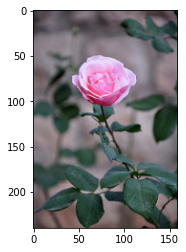

In [ ]:
image = io.imread("rose.jpg")
plt.imshow(image)

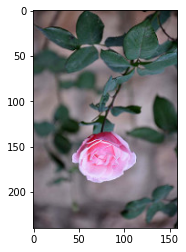

In [ ]:
image_final = np.flipud(image)
plt.imshow(image_final)

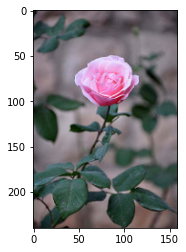

In [ ]:
image_fliplr = np.fliplr(image)
plt.imshow(image_fliplr)

In [ ]:
# First, define the shifting transformations
shift_x, shift_y = image.shape[0]/2, image.shape[1]/2
matrix_to_topleft = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
matrix_to_center = transform.SimilarityTransform(translation=[shift_x, shift_y])

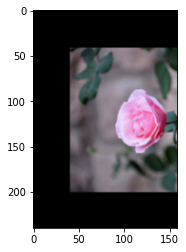

In [ ]:
# Second, perform rotation transform
rot_transforms =  transform.AffineTransform(rotation=np.deg2rad(90))
rotation = matrix_to_topleft + rot_transforms + matrix_to_center
rot_image = transform.warp(image, rotation)
plt.imshow(rot_image)

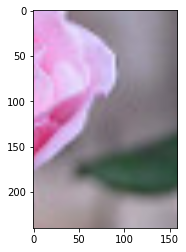

In [ ]:
# Third, perform the scaling transform with 4X zoom-in
scale_transforms = transform.AffineTransform(scale=(0.25, 0.25))
zoom = matrix_to_topleft + scale_transforms + matrix_to_center
rot_image = transform.warp(image, zoom)
plt.imshow(rot_image)

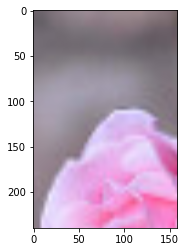

In [ ]:
# Add up the transforms
rot_plus_scale_matrix = matrix_to_topleft + rot_transforms + scale_transforms + matrix_to_center
# Finally, apply the added-up transformation 
final_image = transform.warp(image, rot_plus_scale_matrix)
plt.imshow(final_image)